# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**import data set**

In [ ]:
cars = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
cars.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


as we see there is no null value and one object type can be converted in to dummies

In [ ]:
cars = pd.get_dummies(cars ,dtype = int, drop_first = True)# drop first is used to not occur multi colinearity
cars.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0


now see the statistics values

In [ ]:
cars.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000,1.000000,1.000000


the columns to be deleted which are not helpful in predictions are cylinder

In [ ]:
cars.drop(['Cylinders'], axis=1, inplace=True)
cars.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,1,0
1,13750,23,72937,90,0,2000,3,5,1165,1,0
2,13950,24,41711,90,0,2000,3,5,1165,1,0
3,14950,26,48000,90,0,2000,3,5,1165,1,0
4,13750,30,38500,90,0,2000,3,5,1170,1,0


histo gram

<ipython-input-196-23f23db09d43>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cars.hist(ax = ax)


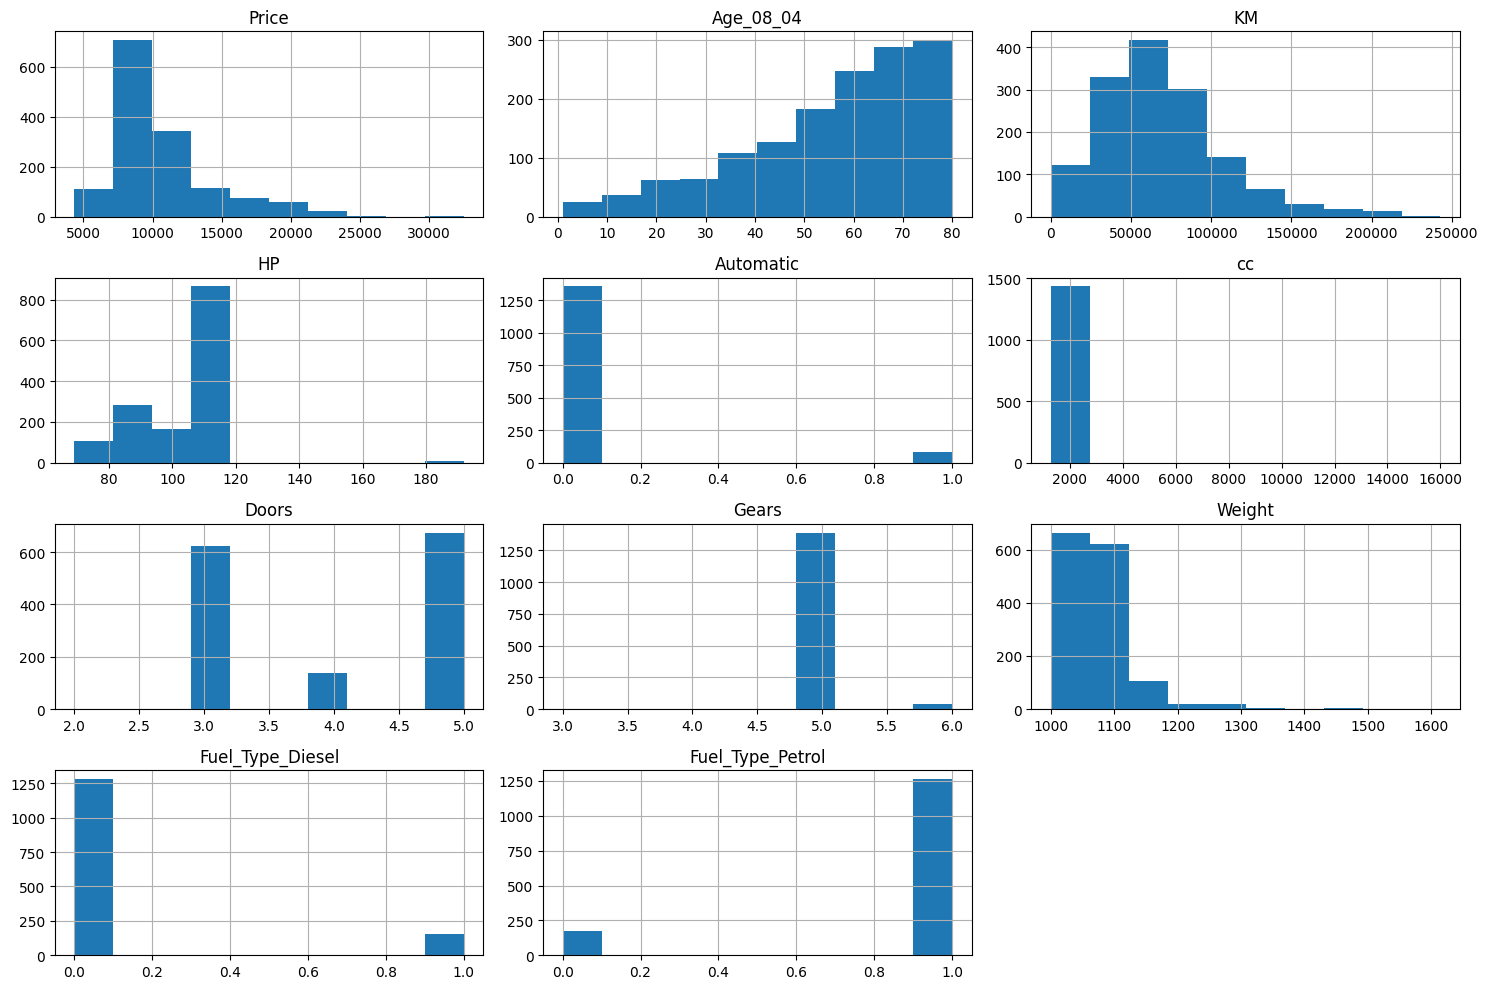

In [ ]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
cars.hist(ax = ax)
plt.tight_layout()
plt.show()

correlation heat map

<Axes: >

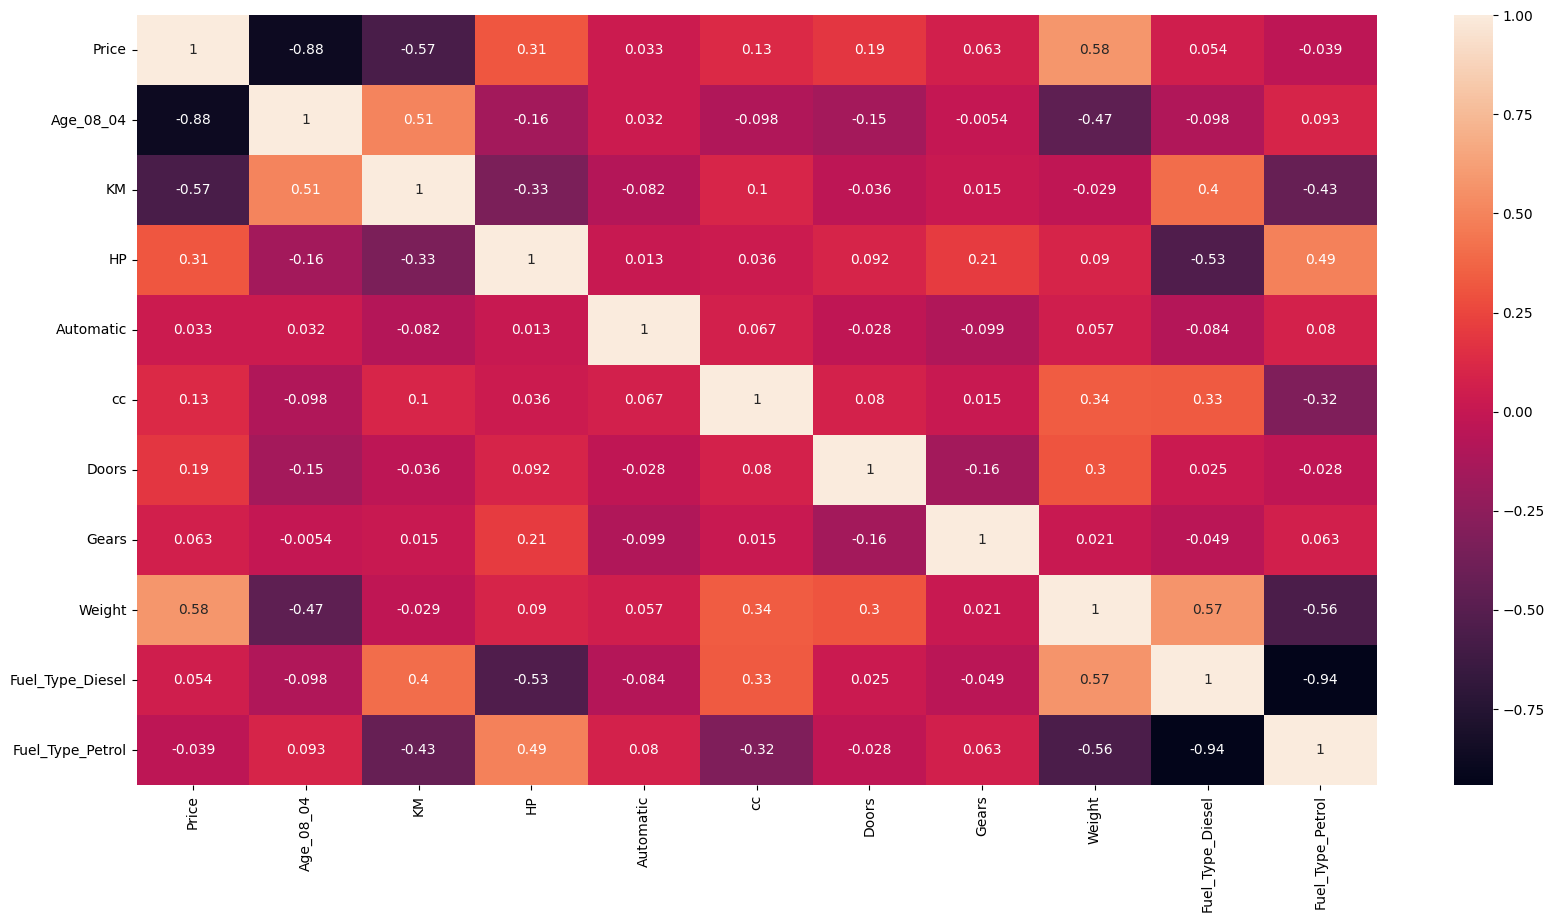

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(cars.corr(), annot=True)


as we see in histogram price is in left skewed and in heat map we can see strong negative corelations for age of car to price and positive to weight of car to price

**boxplot**

<Axes: >

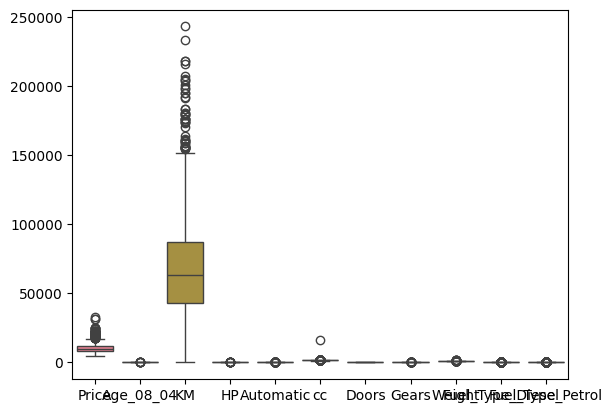

In [ ]:
sns.boxplot(cars)

we can see outliers in many columns where the data is real it is not good to use methods like capping transforming but we can delete the outliers because we are predicting the price so we can predict price for normal data or we can use robust model

# pairplot

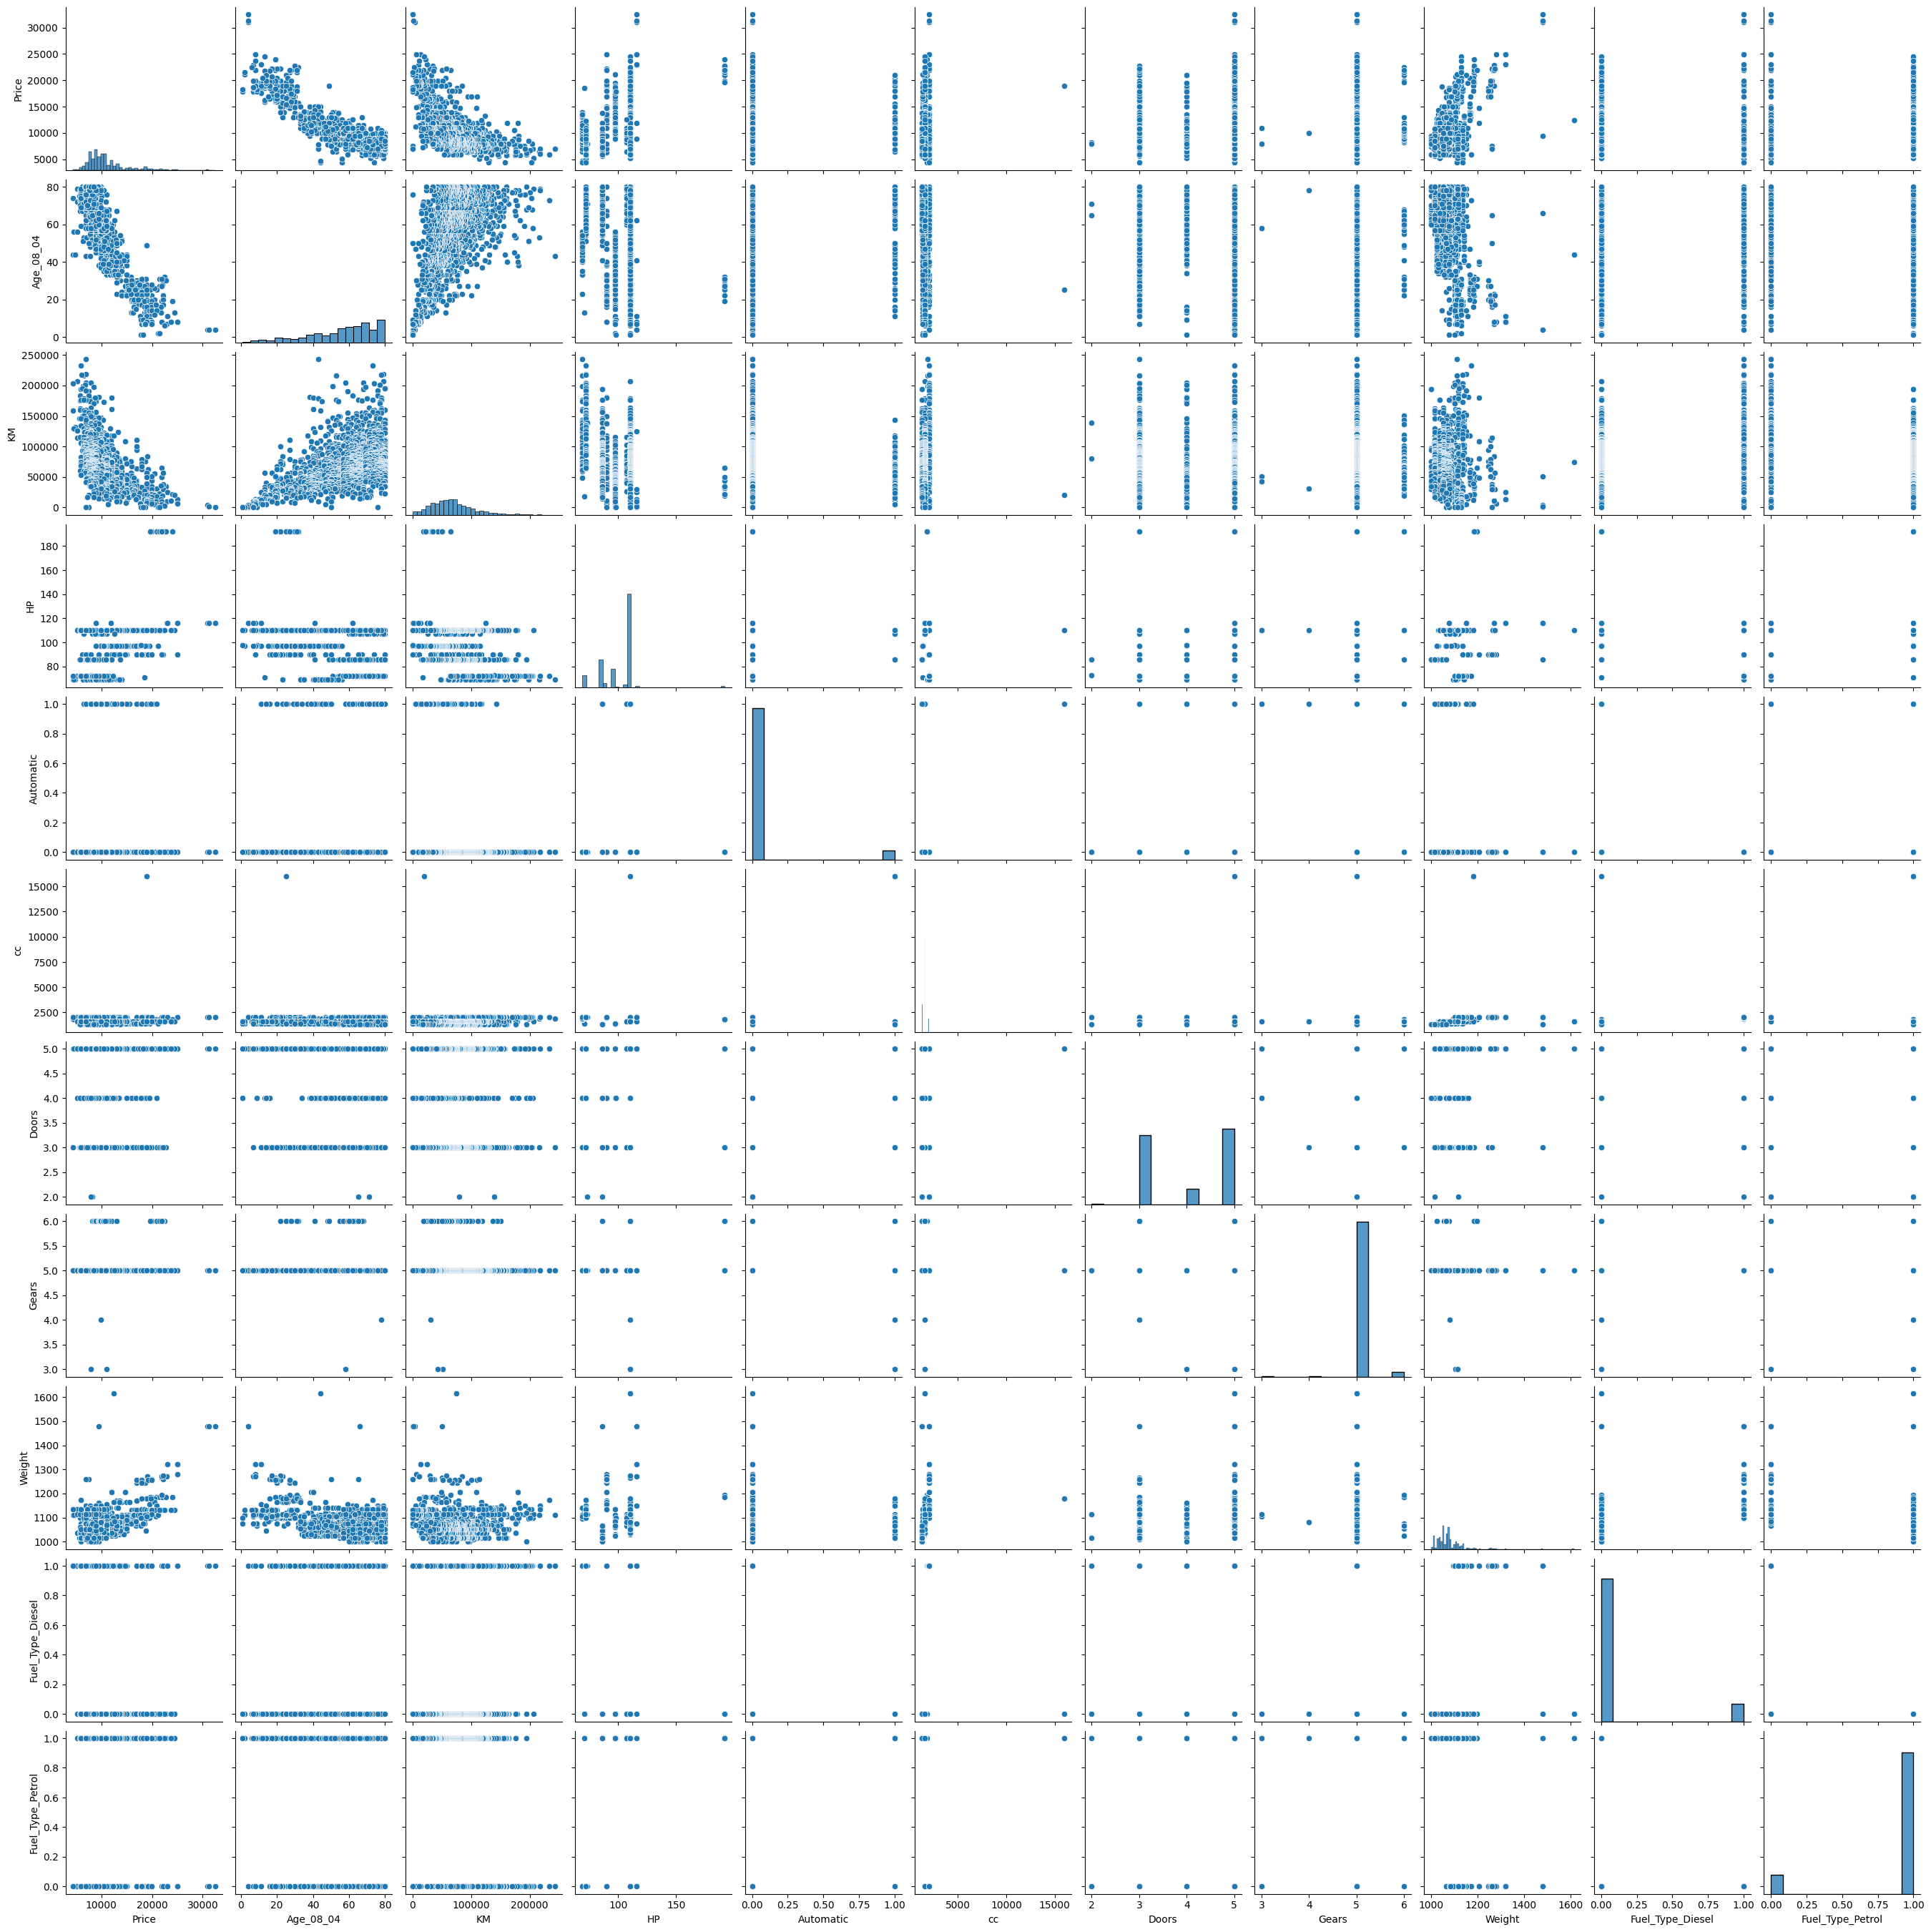

In [ ]:
sns.pairplot(cars)

if we view the plot we can see a clear pattern in some paired plots

now calculating vif and deleting higher vif for better model predictions vif is used to detect and remove multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe, threshold=5.0):
    # Calculate VIF for each independent variable
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                       for i in range(dataframe.shape[1])]

    print("\nCurrent VIF values:")
    print(vif_data)

    # Identify the feature with the highest VIF
    max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax()]
    max_vif_value = max_vif_feature['VIF']

    print(f"\nFeature with highest VIF: {max_vif_feature['feature']} ({max_vif_value:.2f})")

    if max_vif_value > threshold:
        print(f"Dropping feature: {max_vif_feature['feature']}")
        # Drop the feature with the highest VIF
        dataframe = dataframe.drop(columns=[max_vif_feature['feature']])
        return dataframe, True  # Indicate that a column was dropped
    else:
        print("\nAll VIF values are below the threshold.")
        return dataframe, False # Indicate no column was dropped

# Separate features (X) and target (y)
# Assuming 'Price' is your target variable
X = cars.drop('Price', axis=1)
y = cars['Price']

# Start the VIF calculation and removal process
threshold = 5.0
dropped_column = True

while dropped_column:
    X, dropped_column = calculate_vif(X, threshold)

print("\nFinal features after VIF removal:")
print(X.columns)


Current VIF values:
            feature         VIF
0         Age_08_04   17.124221
1                KM    8.649317
2                HP   96.748733
3         Automatic    1.149266
4                cc   18.122611
5             Doors   22.992158
6             Gears  530.647792
7            Weight  652.824912
8  Fuel_Type_Diesel   12.637757
9  Fuel_Type_Petrol   75.443711

Feature with highest VIF: Weight (652.82)
Dropping feature: Weight

Current VIF values:
            feature         VIF
0         Age_08_04   16.725223
1                KM    8.616370
2                HP   79.837269
3         Automatic    1.089789
4                cc   18.063459
5             Doors   18.635955
6             Gears  188.457689
7  Fuel_Type_Diesel   10.479440
8  Fuel_Type_Petrol   74.535577

Feature with highest VIF: Gears (188.46)
Dropping feature: Gears

Current VIF values:
            feature        VIF
0         Age_08_04  16.089395
1                KM   8.391326
2                HP  48.547897
3      

as we see there are 4 columns which are not multi colinear now we can train data better

# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
cars = cars[[ 'Price','KM', 'Automatic', 'Doors', 'Fuel_Type_Diesel']]
cars.head()

,Price,KM,Automatic,Doors,Fuel_Type_Diesel
0,13500,46986,0,3,1
1,13750,72937,0,3,1
2,13950,41711,0,3,1
3,14950,48000,0,3,1
4,13750,38500,0,3,1


In [ ]:
from sklearn.model_selection import train_test_split


X = cars.drop('Price', axis=1)
y = cars['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1148, 4)
Shape of X_test: (288, 4)
Shape of y_train: (1148,)
Shape of y_test: (288,)


# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

**model 1 standard MLR**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model_standard_mlr = LinearRegression()
model_standard_mlr.fit(X_train, y_train)

# Show coefficients and intercept
print("Coefficients:")
print(model_standard_mlr.coef_)
print("\nIntercept:")
model_standard_mlr.intercept_

Coefficients:
[-6.73588390e-02  1.57174318e+02  5.55899269e+02  3.83421802e+03]

Intercept:


np.float64(12706.122301225694)

**model 2 elastic net regression**



In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the Elastic Net model
model_elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # alpha is the regularization strength, l1_ratio mixes L1 and L2
model_elastic_net.fit(X_train, y_train)

# Show coefficients and intercept
print("Coefficients:")
print(model_elastic_net.coef_)
print("\nIntercept:")
model_elastic_net.intercept_

Coefficients:
[-5.61832975e-02 -9.34000326e+00  3.76721621e+02  5.48273732e+02]

Intercept:


np.float64(13041.452007705715)

**model 3 MLR with back word elemination**

In [ ]:
import statsmodels.api as sm

def backward_elimination(X_train, y_train, significance_level=0.05):
    features = X_train.columns.tolist()
    while len(features) > 0:
        X_train_temp = X_train[features]
        X_train_temp = sm.add_constant(X_train_temp) # Add a constant for the intercept
        model = sm.OLS(y_train, X_train_temp).fit()
        p_values = model.pvalues.iloc[1:]  # Exclude the constant's p-value
        max_p_value = max(p_values)
        if max_p_value > significance_level:
            redundant_feature = p_values.idxmax()
            print(f"Dropping feature '{redundant_feature}' with p-value {max_p_value:.4f}")
            features.remove(redundant_feature)
        else:
            break
    return sm.OLS(y_train, sm.add_constant(X_train[features])).fit()

print("\n--- Model 3 (MLR with Backward Elimination) ---")
model_backward_elimination = backward_elimination(X_train, y_train)

print("\nCoefficients (including intercept):")
print(model_backward_elimination.params)

print("\nIntercept:")
print(model_backward_elimination.params.loc['const'])


--- Model 3 (MLR with Backward Elimination) ---
Dropping feature 'Automatic' with p-value 0.6518

Coefficients (including intercept):
const               12722.213000
KM                     -0.067410
Doors                 555.195744
Fuel_Type_Diesel     3826.704970
dtype: float64

Intercept:
12722.213000114043


# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Model 1: Standard MLR Evaluation ---
print("\n--- Evaluation of Model 1 (Standard MLR) ---")
y_pred_standard_mlr = model_standard_mlr.predict(X_test)

mae_standard_mlr = mean_absolute_error(y_test, y_pred_standard_mlr)
mse_standard_mlr = mean_squared_error(y_test, y_pred_standard_mlr)
rmse_standard_mlr = np.sqrt(mse_standard_mlr)
r2_standard_mlr = r2_score(y_test, y_pred_standard_mlr)

print(f"Mean Absolute Error (MAE): {mae_standard_mlr:.2f}")
print(f"Mean Squared Error (MSE): {mse_standard_mlr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_standard_mlr:.2f}")
print(f"R-squared (R2): {r2_standard_mlr:.2f}")

# --- Model 2: Elastic Net Evaluation ---
print("\n--- Evaluation of Model 2 (Elastic Net) ---")
y_pred_elastic_net = model_elastic_net.predict(X_test)

mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f"Mean Absolute Error (MAE): {mae_elastic_net:.2f}")
print(f"Mean Squared Error (MSE): {mse_elastic_net:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_elastic_net:.2f}")
print(f"R-squared (R2): {r2_elastic_net:.2f}")

# --- Model 3: Backward Elimination Evaluation ---
print("\n--- Evaluation of Model 3 (Backward Elimination) ---")
# Model 3 was built using sm.OLS, so it expects the constant.
# Need to add the constant to the test set as well.
X_test_with_constant = sm.add_constant(X_test[model_backward_elimination.params.index.tolist()[1:]]) # Exclude 'const' and select features used in the final model
y_pred_backward_elimination = model_backward_elimination.predict(X_test_with_constant)

mae_backward_elimination = mean_absolute_error(y_test, y_pred_backward_elimination)
mse_backward_elimination = mean_squared_error(y_test, y_pred_backward_elimination)
rmse_backward_elimination = np.sqrt(mse_backward_elimination)
r2_backward_elimination = r2_score(y_test, y_pred_backward_elimination)

print(f"Mean Absolute Error (MAE): {mae_backward_elimination:.2f}")
print(f"Mean Squared Error (MSE): {mse_backward_elimination:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_backward_elimination:.2f}")
print(f"R-squared (R2): {r2_backward_elimination:.2f}")


--- Evaluation of Model 1 (Standard MLR) ---
Mean Absolute Error (MAE): 2000.20
Mean Squared Error (MSE): 7239026.59
Root Mean Squared Error (RMSE): 2690.54
R-squared (R2): 0.46

--- Evaluation of Model 2 (Elastic Net) ---
Mean Absolute Error (MAE): 2061.79
Mean Squared Error (MSE): 8225781.80
Root Mean Squared Error (RMSE): 2868.06
R-squared (R2): 0.38

--- Evaluation of Model 3 (Backward Elimination) ---
Mean Absolute Error (MAE): 2002.70
Mean Squared Error (MSE): 7238020.26
Root Mean Squared Error (RMSE): 2690.36
R-squared (R2): 0.46


as we see above three models i belive standard mlr model is perfect to predict price for car


--- Residual Analysis for Model 1 (Standard MLR) ---


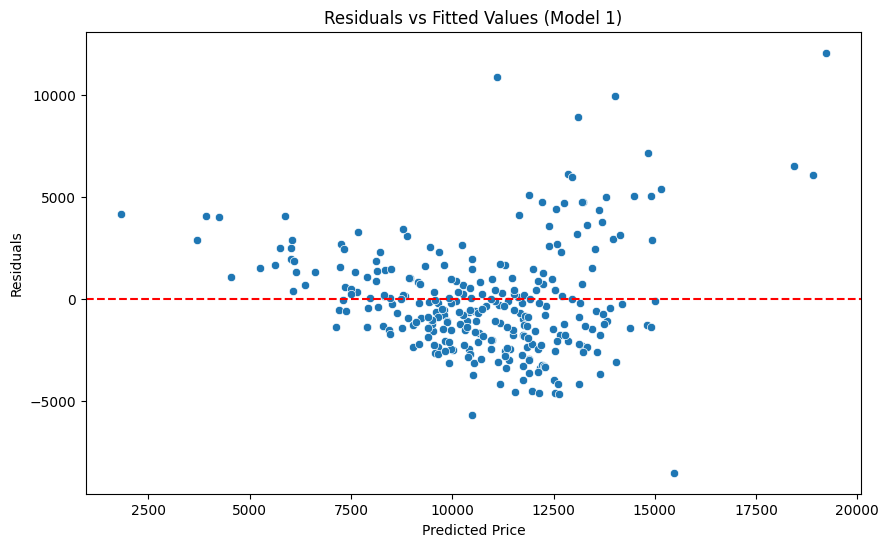

<Figure size 800x600 with 0 Axes>

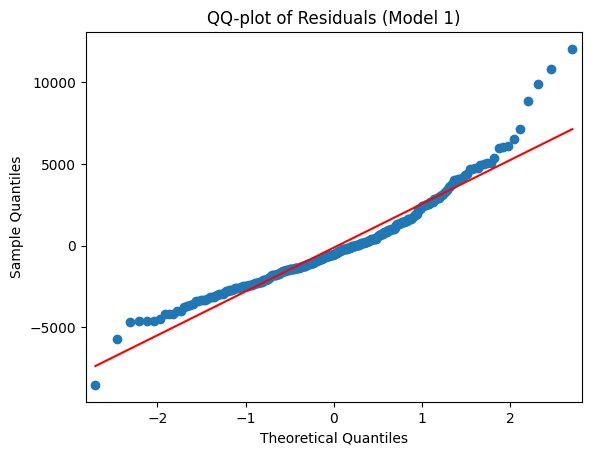

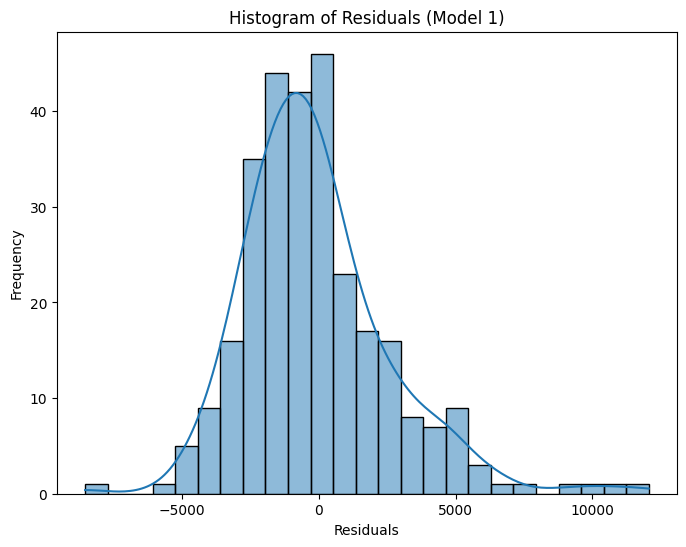


Predicted price for the new car: 14840.10


In [ ]:
# 5. Analyze the residuals of the chosen model for assumptions of linear regression (e.g., normality, heteroscedasticity).
# Choosing Model 1 (Standard MLR) as the preferred model based on evaluation metrics
print("\n--- Residual Analysis for Model 1 (Standard MLR) ---")

# Calculate residuals
residuals = y_test - y_pred_standard_mlr

# Plotting Residuals vs Fitted values to check for heteroscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_standard_mlr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Model 1)")
plt.show()

# QQ-plot of residuals to check for normality
import statsmodels.api as sm
import pylab as py
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s') # line='s' plots a 45-degree line for comparison
plt.title("QQ-plot of Residuals (Model 1)")
plt.show()

# Histogram of residuals to check for normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Model 1)")
plt.show()

# 6. Predict the price for a new car using the chosen model.

# Example new car data (ensure it has the same features as the training data in the correct order)
# Features used in the final model: 'KM', 'Automatic', 'Doors', 'Fuel_Type_Diesel'
new_car_data = pd.DataFrame([[50000, 0, 3, 1]], columns=['KM', 'Automatic', 'Doors', 'Fuel_Type_Diesel'])

# Predict the price using Model 1
predicted_price = model_standard_mlr.predict(new_car_data)

print(f"\nPredicted price for the new car: {predicted_price[0]:.2f}")

as we see there is lot of deviation in the qq plot and we see some skew and heavier distribution in histo gram so using log transform to make it good


--- Model 1 (Standard MLR) with Log Transformed Price ---
Coefficients:
[-5.68334377e-06  1.19814022e-02  4.76726712e-02  2.76872841e-01]

Intercept:
9.402849762885813
Mean Absolute Error (MAE) on log scale: 0.1656
Mean Squared Error (MSE) on log scale: 0.0449
Root Mean Squared Error (RMSE) on log scale: 0.2120
R-squared (R2) on log scale: 0.4826

Mean Absolute Error (MAE) on original scale: 1822.84
Mean Squared Error (MSE) on original scale: 6609824.39
Root Mean Squared Error (RMSE) on original scale: 2570.96
R-squared (R2) on original scale: 0.50

--- Residual Analysis for Model 1 (Standard MLR) with Log Transformed Price ---


<ipython-input-208-9c321e5a67cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Log_Price'] = np.log(cars['Price'])


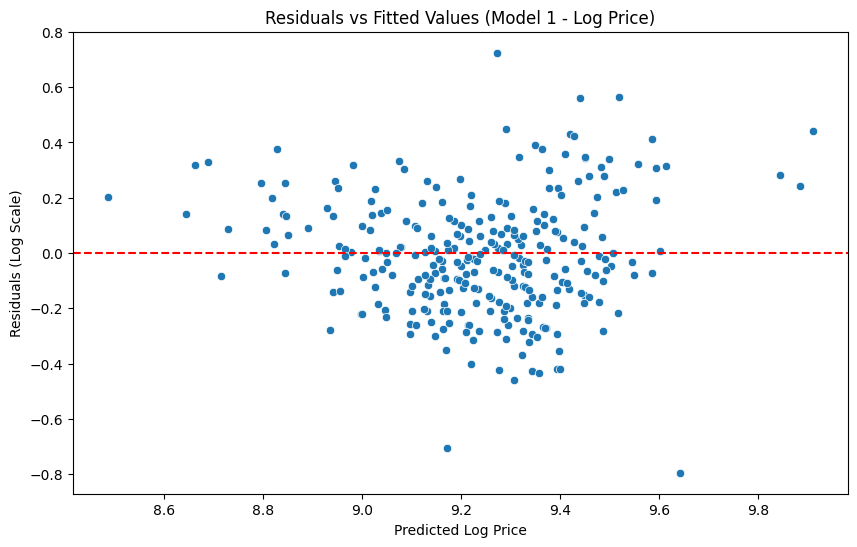

<Figure size 800x600 with 0 Axes>

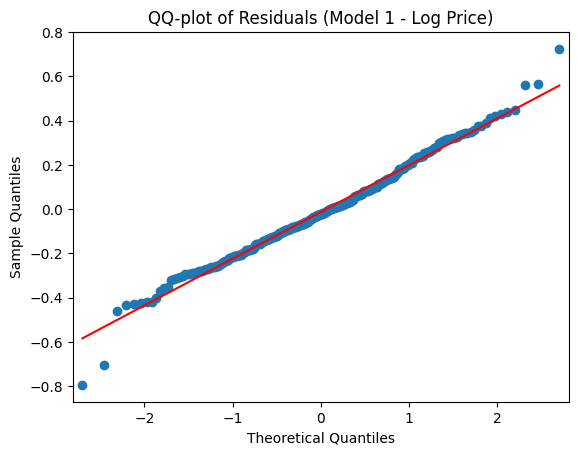

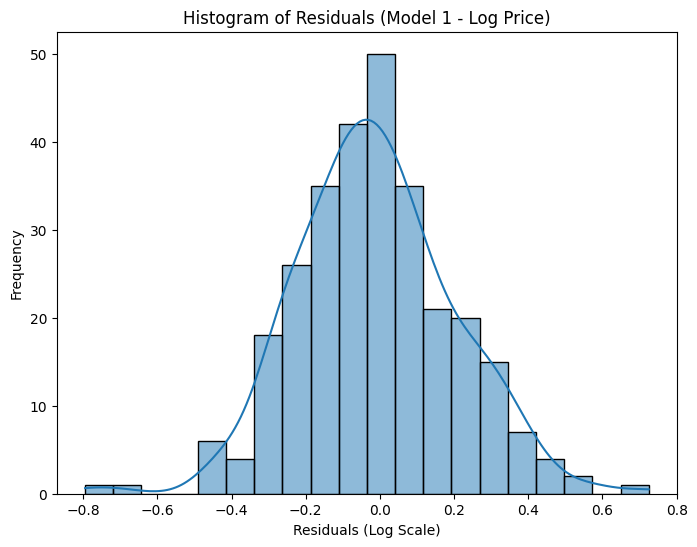

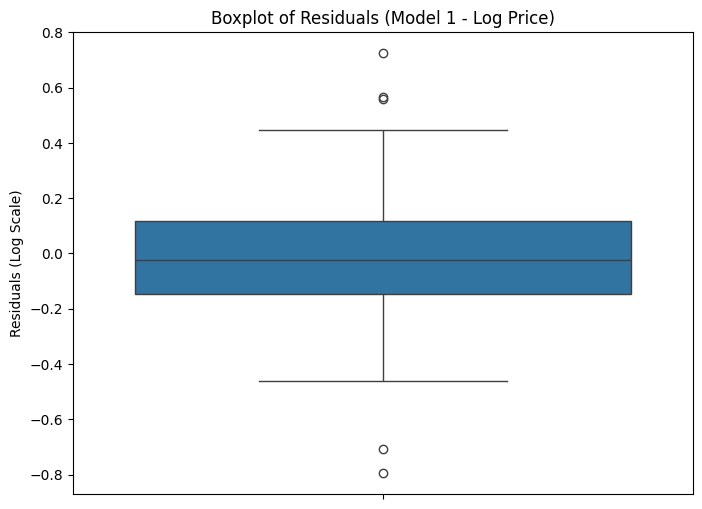


Predicted log price for the new car: 9.5386
Predicted price (original scale) for the new car: 13885.13


In [ ]:
# Transform the dependent variable (Price) using log
cars['Log_Price'] = np.log(cars['Price'])

# Redefine X and y with the new target
X_log = cars.drop(['Price', 'Log_Price'], axis=1) # Drop original Price and the new Log_Price for features
y_log = cars['Log_Price']

# Split the dataset into training and testing sets for the log-transformed data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

print("\n--- Model 1 (Standard MLR) with Log Transformed Price ---")
# Initialize and fit the model
model_standard_mlr_log = LinearRegression()
model_standard_mlr_log.fit(X_train_log, y_train_log)

# Show coefficients and intercept
print("Coefficients:")
print(model_standard_mlr_log.coef_)
print("\nIntercept:")
print(model_standard_mlr_log.intercept_)

# Evaluate the model
y_pred_standard_mlr_log = model_standard_mlr_log.predict(X_test_log)

# Since the predictions are in log scale, evaluate using log values or inverse transform for evaluation in original scale
mae_standard_mlr_log = mean_absolute_error(y_test_log, y_pred_standard_mlr_log)
mse_standard_mlr_log = mean_squared_error(y_test_log, y_pred_standard_mlr_log)
rmse_standard_mlr_log = np.sqrt(mse_standard_mlr_log)
r2_standard_mlr_log = r2_score(y_test_log, y_pred_standard_mlr_log)

print(f"Mean Absolute Error (MAE) on log scale: {mae_standard_mlr_log:.4f}")
print(f"Mean Squared Error (MSE) on log scale: {mse_standard_mlr_log:.4f}")
print(f"Root Mean Squared Error (RMSE) on log scale: {rmse_standard_mlr_log:.4f}")
print(f"R-squared (R2) on log scale: {r2_standard_mlr_log:.4f}")

# To get metrics in original scale, inverse transform predictions and actual values
y_test_original = np.exp(y_test_log)
y_pred_original = np.exp(y_pred_standard_mlr_log)

mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original) # Note: R2 might not be directly comparable

print(f"\nMean Absolute Error (MAE) on original scale: {mae_original:.2f}")
print(f"Mean Squared Error (MSE) on original scale: {mse_original:.2f}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse_original:.2f}")
print(f"R-squared (R2) on original scale: {r2_original:.2f}")


# --- Residual Analysis for Model 1 (Standard MLR) with Log Transformed Price ---
print("\n--- Residual Analysis for Model 1 (Standard MLR) with Log Transformed Price ---")

# Calculate residuals
residuals_log = y_test_log - y_pred_standard_mlr_log

# Plotting Residuals vs Fitted values to check for heteroscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_standard_mlr_log, y=residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals (Log Scale)")
plt.title("Residuals vs Fitted Values (Model 1 - Log Price)")
plt.show()

# QQ-plot of residuals to check for normality
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_log, line='s') # line='s' plots a 45-degree line for comparison
plt.title("QQ-plot of Residuals (Model 1 - Log Price)")
plt.show()

# Histogram of residuals to check for normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals_log, kde=True)
plt.xlabel("Residuals (Log Scale)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Model 1 - Log Price)")
plt.show()

# Boxplot of residuals
plt.figure(figsize=(8, 6))
sns.boxplot(y=residuals_log)
plt.ylabel("Residuals (Log Scale)")
plt.title("Boxplot of Residuals (Model 1 - Log Price)")
plt.show()

# 6. Predict the price for a new car using the chosen model (Log Transformed Price).

# Example new car data (ensure it has the same features as the training data in the correct order)
# Features used: 'KM', 'Automatic', 'Doors', 'Fuel_Type_Diesel'
new_car_data = pd.DataFrame([[50000, 0, 3, 1]], columns=['KM', 'Automatic', 'Doors', 'Fuel_Type_Diesel'])

# Predict the log price using Model 1 (Log Transformed)
predicted_log_price = model_standard_mlr_log.predict(new_car_data)

# Inverse transform the predicted log price to get the price in the original scale
predicted_price_original_scale = np.exp(predicted_log_price)

print(f"\nPredicted log price for the new car: {predicted_log_price[0]:.4f}")
print(f"Predicted price (original scale) for the new car: {predicted_price_original_scale[0]:.2f}")

The distribution of residuals is fairly symmetric with a slight negative skew, which is acceptable.

There are a few outliers, but not enough to suggest a serious problem.

No strong signs of heteroscedasticity or heavy-tailed distribution.

**5.Apply Lasso and Ridge methods on the model.**

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Apply Lasso Regression
print("\n--- Lasso Regression ---")
# Initialize Lasso model (alpha is the regularization strength)
# A higher alpha means stronger regularization. You might need to tune this value.
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_log, y_train_log) # Using the log-transformed data

print("Coefficients:")
print(lasso_model.coef_)
print("\nIntercept:")
print(lasso_model.intercept_)

# Evaluate the Lasso model
y_pred_lasso_log = lasso_model.predict(X_test_log)

mae_lasso_log = mean_absolute_error(y_test_log, y_pred_lasso_log)
mse_lasso_log = mean_squared_error(y_test_log, y_pred_lasso_log)
rmse_lasso_log = np.sqrt(mse_lasso_log)
r2_lasso_log = r2_score(y_test_log, y_pred_lasso_log)

print(f"\nMean Absolute Error (MAE) on log scale (Lasso): {mae_lasso_log:.4f}")
print(f"Mean Squared Error (MSE) on log scale (Lasso): {mse_lasso_log:.4f}")
print(f"Root Mean Squared Error (RMSE) on log scale (Lasso): {rmse_lasso_log:.4f}")
print(f"R-squared (R2) on log scale (Lasso): {r2_lasso_log:.4f}")

# Apply Ridge Regression
print("\n--- Ridge Regression ---")
# Initialize Ridge model (alpha is the regularization strength)
# A higher alpha means stronger regularization. You might need to tune this value.
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_log, y_train_log) # Using the log-transformed data

print("Coefficients:")
print(ridge_model.coef_)
print("\nIntercept:")
print(ridge_model.intercept_)

# Evaluate the Ridge model
y_pred_ridge_log = ridge_model.predict(X_test_log)

mae_ridge_log = mean_absolute_error(y_test_log, y_pred_ridge_log)
mse_ridge_log = mean_squared_error(y_test_log, y_pred_ridge_log)
rmse_ridge_log = np.sqrt(mse_ridge_log)
r2_ridge_log = r2_score(y_test_log, y_pred_ridge_log)

print(f"\nMean Absolute Error (MAE) on log scale (Ridge): {mae_ridge_log:.4f}")
print(f"Mean Squared Error (MSE) on log scale (Ridge): {mse_ridge_log:.4f}")
print(f"Root Mean Squared Error (RMSE) on log scale (Ridge): {rmse_ridge_log:.4f}")
print(f"R-squared (R2) on log scale (Ridge): {r2_ridge_log:.4f}")



--- Lasso Regression ---
Coefficients:
[-4.76559005e-06 -0.00000000e+00  0.00000000e+00  0.00000000e+00]

Intercept:
9.564183773998877

Mean Absolute Error (MAE) on log scale (Lasso): 0.1786
Mean Squared Error (MSE) on log scale (Lasso): 0.0535
Root Mean Squared Error (RMSE) on log scale (Lasso): 0.2312
R-squared (R2) on log scale (Lasso): 0.3841

--- Ridge Regression ---
Coefficients:
[-5.67356490e-06  1.15714347e-02  4.76510760e-02  2.73991191e-01]

Intercept:
9.402612928664025

Mean Absolute Error (MAE) on log scale (Ridge): 0.1655
Mean Squared Error (MSE) on log scale (Ridge): 0.0449
Root Mean Squared Error (RMSE) on log scale (Ridge): 0.2120
R-squared (R2) on log scale (Ridge): 0.4826


as we used lasso and ridge method on model we csn see ridge r2 is high so we predict price using ridge

<Figure size 800x600 with 0 Axes>

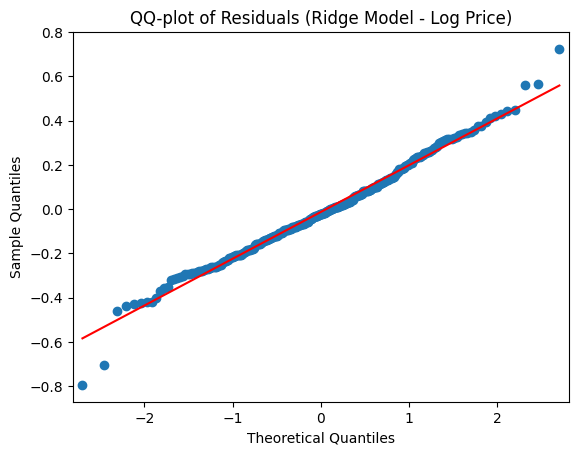

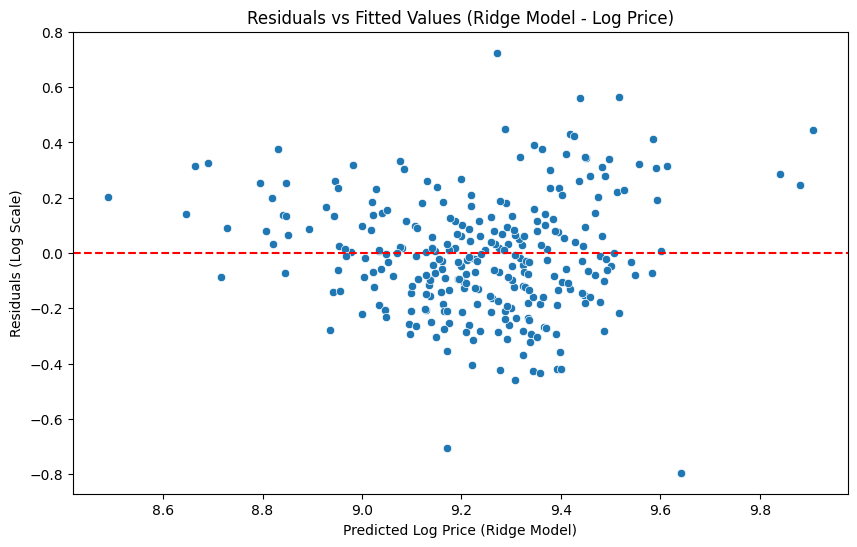


Predicted log price for the new car (Ridge Model): 9.5359
Predicted price (original scale) for the new car (Ridge Model): 13847.76


In [ ]:
# Calculate residuals for Ridge model
residuals_ridge_log = y_test_log - y_pred_ridge_log

# QQ-plot of residuals for Ridge model
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_ridge_log, line='s') # line='s' plots a 45-degree line for comparison
plt.title("QQ-plot of Residuals (Ridge Model - Log Price)")
plt.show()

# Plotting Residuals vs Fitted values for Ridge model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ridge_log, y=residuals_ridge_log)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Log Price (Ridge Model)")
plt.ylabel("Residuals (Log Scale)")
plt.title("Residuals vs Fitted Values (Ridge Model - Log Price)")
plt.show()


# Predict the price for a new car using the Ridge model

# Example new car data (ensure it has the same features as the training data in the correct order)
# Features used: 'KM', 'Automatic', 'Doors', 'Fuel_Type_Diesel'
new_car_data = pd.DataFrame([[50000, 0, 3, 1]], columns=['KM', 'Automatic', 'Doors', 'Fuel_Type_Diesel'])

# Predict the log price using the Ridge model
predicted_log_price_ridge = ridge_model.predict(new_car_data)

# Inverse transform the predicted log price to get the price in the original scale
predicted_price_original_scale_ridge = np.exp(predicted_log_price_ridge)

print(f"\nPredicted log price for the new car (Ridge Model): {predicted_log_price_ridge[0]:.4f}")
print(f"Predicted price (original scale) for the new car (Ridge Model): {predicted_price_original_scale_ridge[0]:.2f}")


ridge model is most useful model to npredict the model it can predict the un seen data also
1. Handles Multicollinearity
2. Reduces Overfitting
3. Improved Prediction Accuracy
4. Controls Model Complexity



# Interview Questions:


**1.What is Normalization & Standardization and how is it helpful?**
Normalization and Standardization are two techniques used in data preprocessing, especially for machine learning and statistical modeling, to scale and transform features so that they can be compared on similar scales. They help models learn better, converge faster, and avoid bias toward features with larger values.


**2.What techniques can be used to address multicollinearity in multiple linear regression?**
To address multicollinearity in multiple linear regression, you can use several techniques to detect and mitigate the problem. Multicollinearity occurs when two or more independent variables are highly correlated, which can distort the estimated coefficients and make the model unstable. but mainly ues vif to detect multi colinearity (Variance Inflation Factor (VIF): VIF > 5 or 10 is often a red flag.) techniques to address them are

1. Remove One of the Correlated Features
If two variables are highly correlated, drop one of them.

2. Combine Features (Feature Engineering)
Create a new feature that captures the information of the correlated variables.

3. Principal Component Analysis (PCA)
Transforms correlated variables into a smaller number of uncorrelated components.

4. Ridge Regression (L2 Regularization)
Adds a penalty term to the loss function to shrink coefficients.

5. Lasso Regression (L1 Regularization)
Like Ridge, but can shrink some coefficients to zero, effectively selecting features.

6. Centering the Data (Mean Subtraction)
Mean-centering your predictors (subtracting the mean) can sometimes reduce multicollinearity between interaction terms.

7. Drop Interaction or Polynomial Terms
High multicollinearity often arises from added interaction or polynomial features.

Consider simplifying the model if complexity isn't essential.

